<a href="https://colab.research.google.com/github/LamaElkhouk/pythonh3hitema/blob/main/Projet_analyse_donn%C3%A9es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projet**

Mon projet consiste à étudier un jeu de données présentant des individus, des étudiants pour étudier et analyser leur santé mental et je souhaite savoir si il y'a un lien entre les differents resultats de ses étudiants et leurs note moyenne !

**Si oui**, serait-il possible d'identifier quels sont le/le(s) groupe(s) d'étudiant(s) le(s) plus toucher par cette influence


In [75]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

df= pd.read_csv('/Student_Mental_health.csv');


# number of rows
rows = len(df.axes[0])
 
# number of columns
cols = len(df.axes[1])

print("Number of Rows: ", rows)
print("Number of Columns: ", cols)
df.head() 


Number of Rows:  101
Number of Columns:  11


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


**Les données (variables) constituant mon dataframe : **



In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

On étudie un échantillon de 101 étudiants ayant 11 caractéristiques:

 => **personnelles** : 
 
 age, domaine d'études, son année d'étude, sa moyenne globale (CGPA = A=4 B=3 C=2 D=1 et F=0) et son état civil.

 => **En rapport avec leur santé mentale**:
 
  Est ce qu'ils sont en dépression? ressent-ils de l'anxiété ? ont-ils déja eu une crise de panique? ont-ils consulté un spécialiste pour un traitement?

=> Il y'a également la toute premiere caractéristique **"timestamp"**,qui selon n'est pas une variable pertinente pour l'étude, elle représente la date et heure à laquel chaque étudiant à été interroger.

Le dataframe est constitué principalement de **variables qualitatives** de type Object (string) et d'**une variable quantitative** "l'age", qui est de type float.


**Dataframe en version plus simplifier**



In [90]:

#J'ai renommé les noms de variables
df.rename(columns = {'Choose your gender':'gender','What is your course?':'course','Your current year of Study':'current year','What is your CGPA?':'CGPA','Do you have Depression?':'depression', 'Do you have Anxiety?':'anxiety','Do you have Panic attack?':'panic attack','Did you seek any specialist for a treatment?':'specialist for a treatment'}, inplace = True)

#J'ai remplacé les 'yes' et 'No' par 1 et 0
df['depression']= df['depression'].replace(['Yes','No'],[1,0])
df['anxiety']= df['anxiety'].replace(['Yes','No'],[1,0])
df['panic attack']= df['panic attack'].replace(['Yes','No'],[1,0])
df['specialist for a treatment']= df['specialist for a treatment'].replace(['Yes','No'],[1,0])
df['Marital status']= df['Marital status'].replace(['Yes','No'],[1,0])


df.head()



,Timestamp,gender,Age,course,current year,CGPA,Marital status,depression,anxiety,panic attack,specialist for a treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,0,1,0,1,0
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,0,0,1,0,0
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,0,1,1,1,0
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,1,1,0,0,0
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,0,0,0,0,0


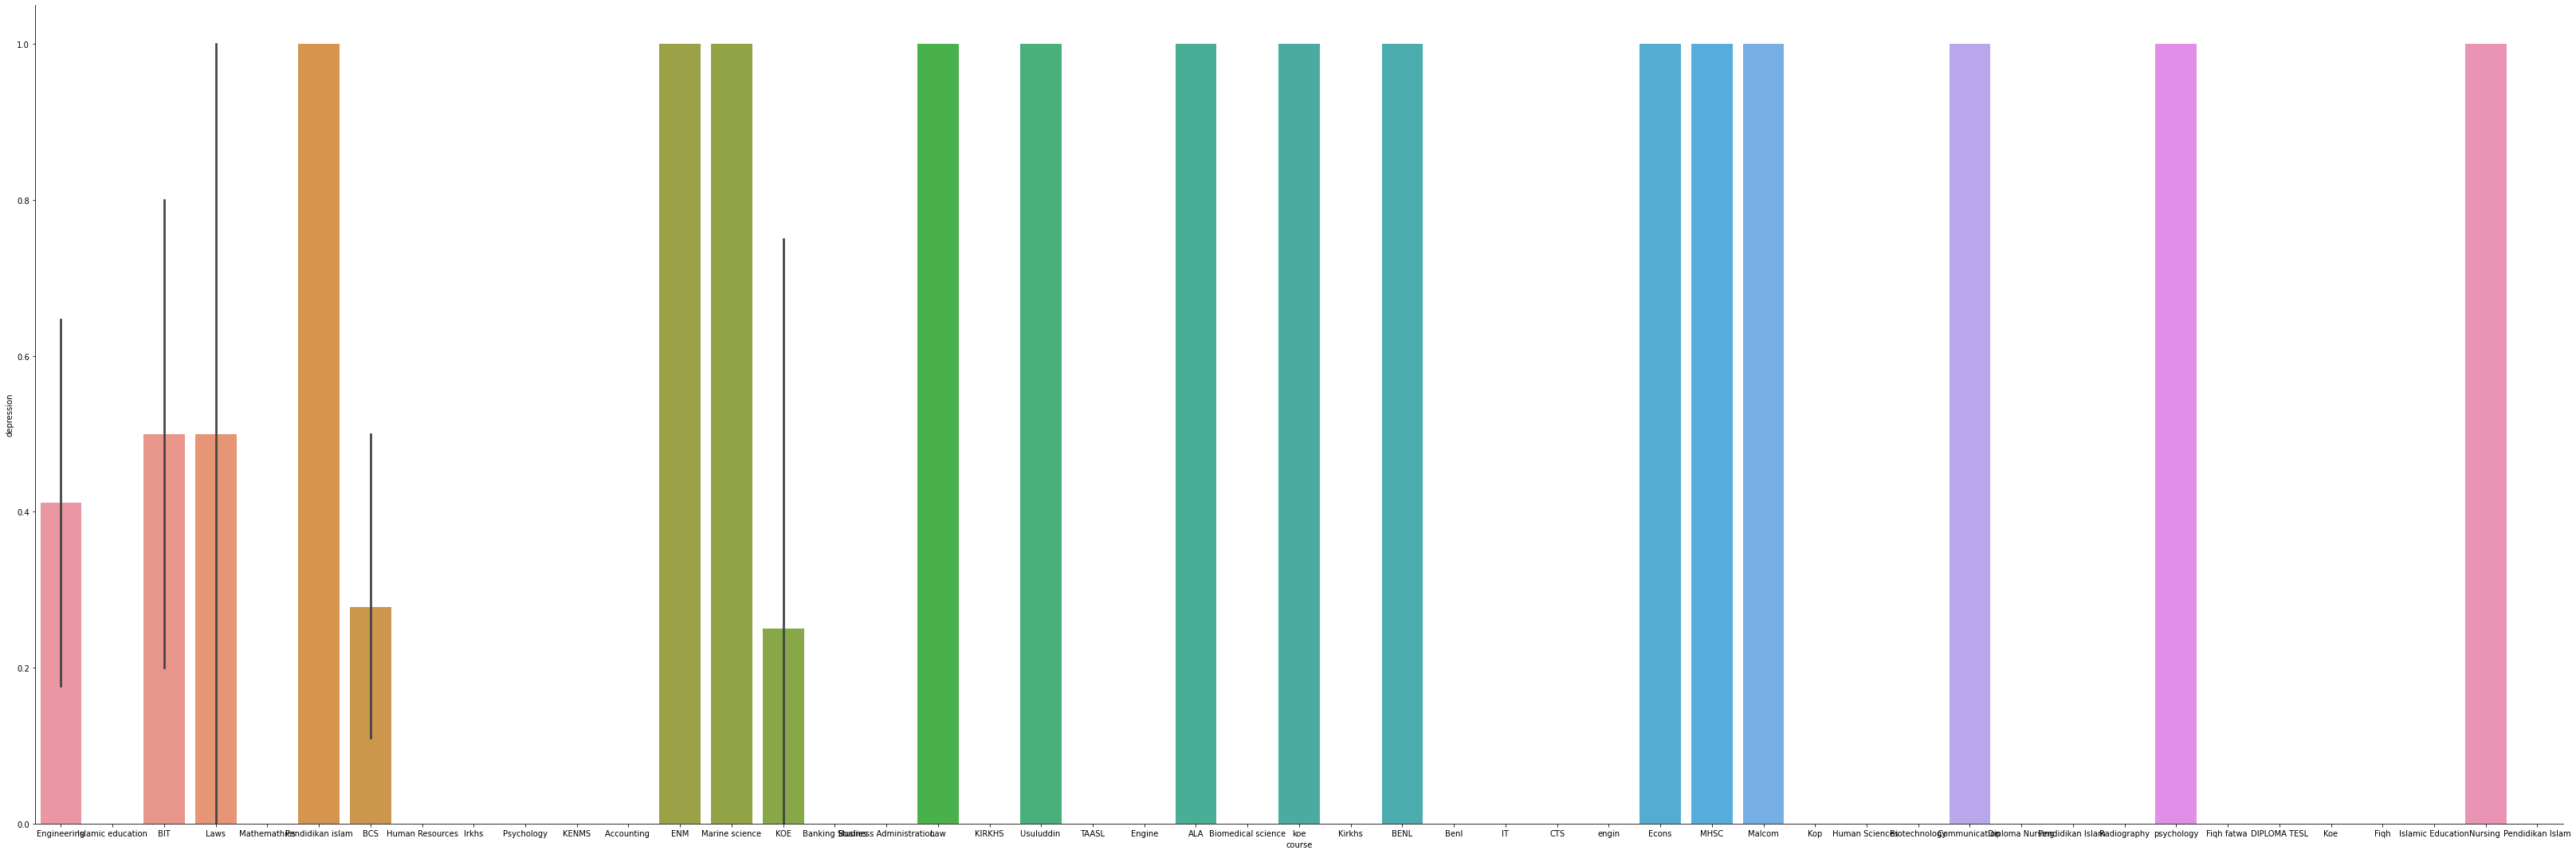

In [99]:
#sb.boxplot(x='gender', y='CGPA', data=df)


df['depression']

sb.catplot(x="course", y="depression", data= df, kind="bar", height=15, aspect=3)

